In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical

In [5]:
from skimage import io

In [6]:
import pandas as pd, numpy as np
from skimage import io

In [7]:
data = pd.read_csv('https://d1p17r2m4rzlbo.cloudfront.net/wp-content/uploads/2017/04/a943287.csv')

In [8]:
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,please_select_the_gender_of_the_person_in_the_picture,please_select_the_gender_of_the_person_in_the_picture:confidence,image_url,please_select_the_gender_of_the_person_in_the_picture_gold,user_id
0,1023132475,False,finalized,1,8/19/2016 17:00:25,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/40...,NaN,40
1,1023132476,False,finalized,1,8/19/2016 17:00:48,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/42...,NaN,42
2,1023132477,False,finalized,1,8/19/2016 17:01:43,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/44...,NaN,44
3,1023132478,False,finalized,1,8/19/2016 17:01:04,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/47...,NaN,47
4,1023132479,False,finalized,1,8/19/2016 17:00:48,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/50...,NaN,50


In [9]:
data[['_unit_id','image_url','please_select_the_gender_of_the_person_in_the_picture']].head()

,_unit_id,image_url,please_select_the_gender_of_the_person_in_the_picture
0,1023132475,https://d1qb2nb5cznatu.cloudfront.net/users/40...,male
1,1023132476,https://d1qb2nb5cznatu.cloudfront.net/users/42...,male
2,1023132477,https://d1qb2nb5cznatu.cloudfront.net/users/44...,male
3,1023132478,https://d1qb2nb5cznatu.cloudfront.net/users/47...,male
4,1023132479,https://d1qb2nb5cznatu.cloudfront.net/users/50...,male


In [10]:
data['please_select_the_gender_of_the_person_in_the_picture'].value_counts()

male      47595
unsure     9122
female     7367
Name: please_select_the_gender_of_the_person_in_the_picture, dtype: int64

In [11]:
data_male = data[data['please_select_the_gender_of_the_person_in_the_picture']=="male"].reset_index(drop='index')
data_female = data[data['please_select_the_gender_of_the_person_in_the_picture']=="female"].reset_index(drop='index')

In [12]:
len(data_male), len(data_female)

(47595, 7367)

In [13]:
final_data = pd.concat([data_male[:1000],data_female[:1000]],axis=0).reset_index(drop='index')
final_data.shape

(2000, 10)

In [14]:
final_data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,please_select_the_gender_of_the_person_in_the_picture,please_select_the_gender_of_the_person_in_the_picture:confidence,image_url,please_select_the_gender_of_the_person_in_the_picture_gold,user_id
0,1023132475,False,finalized,1,8/19/2016 17:00:25,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/40...,NaN,40
1,1023132476,False,finalized,1,8/19/2016 17:00:48,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/42...,NaN,42
2,1023132477,False,finalized,1,8/19/2016 17:01:43,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/44...,NaN,44
3,1023132478,False,finalized,1,8/19/2016 17:01:04,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/47...,NaN,47
4,1023132479,False,finalized,1,8/19/2016 17:00:48,male,1.0,https://d1qb2nb5cznatu.cloudfront.net/users/50...,NaN,50


In [15]:
final_data.image_url[2]

'https://d1qb2nb5cznatu.cloudfront.net/users/44-large'

In [16]:
final_data.loc[1200]

_unit_id                                                                                                   1023135686
_golden                                                                                                         False
_unit_state                                                                                                 finalized
_trusted_judgments                                                                                                  1
_last_judgment_at                                                                                  8/19/2016 22:31:27
please_select_the_gender_of_the_person_in_the_picture                                                          female
please_select_the_gender_of_the_person_in_the_picture:confidence                                                    1
image_url                                                           https://d1qb2nb5cznatu.cloudfront.net/users/29...
please_select_the_gender_of_the_person_in_the_picture_go

In [17]:
x = []
y = []
for i in range(final_data.shape[0]):
  if(i%100==0):
    print(i)
  try:
    image = io.imread(final_data.loc[i]['image_url'])
    if(image.shape==(300,300,3)):
      x.append(image)
      y.append(final_data.loc[i]['please_select_the_gender_of_the_person_in_the_picture'])
  except:
    continue

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


In [41]:
x.shape,y.shape

AttributeError: 'list' object has no attribute 'shape'

In [18]:
x2 = []
y2 = []
for i in range(len(x)):
  x2.append(x[i])
  img_label = np.where(y[i]=="male",1,0)
  y2.append(img_label)

In [19]:
x2 = np.array(x2)
x2 = x2.reshape(x2.shape[0],x2.shape[1],x2.shape[2],3)

In [42]:
x2.shape

(1743, 300, 300, 3)

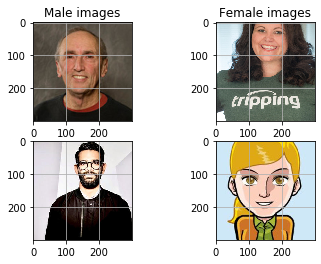

In [20]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow(x[0])
plt.title('Male images')
plt.grid('off')
plt.subplot(222)
plt.title('Female images')
plt.imshow(x[1000])
plt.grid('off')
plt.subplot(223)
plt.imshow(x[1])
plt.grid('off')
plt.subplot(224)
plt.imshow(x[1001])
plt.grid('off')
plt.show()

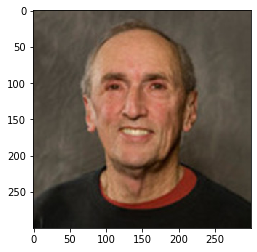

In [21]:
plt.imshow(x[0])

In [22]:
final_data.loc[1]['image_url']

'https://d1qb2nb5cznatu.cloudfront.net/users/42-large'

In [23]:
image2 = io.imread(final_data.loc[2]['image_url'])
image2

array([[[ 52,  51,  58],
        [ 35,  34,  41],
        [ 28,  26,  34],
        ...,
        [ 13,  10,  12],
        [ 16,  13,  13],
        [ 17,  14,  16]],

       [[ 54,  53,  60],
        [ 37,  36,  43],
        [ 23,  22,  29],
        ...,
        [ 15,  13,  15],
        [ 16,  14,  15],
        [ 16,  14,  15]],

       [[ 38,  37,  44],
        [ 33,  32,  39],
        [ 29,  28,  35],
        ...,
        [ 15,  12,  15],
        [ 15,  13,  13],
        [ 16,  13,  14]],

       ...,

       [[ 76,  47,  48],
        [ 76,  48,  49],
        [ 77,  49,  50],
        ...,
        [126, 111, 119],
        [ 61,  51,  61],
        [  6,   0,   6]],

       [[ 74,  46,  48],
        [ 75,  46,  48],
        [ 75,  47,  50],
        ...,
        [132, 119, 128],
        [ 89,  80,  92],
        [ 14,   7,  18]],

       [[ 72,  45,  47],
        [ 73,  45,  48],
        [ 74,  46,  48],
        ...,
        [115, 100, 110],
        [110, 101, 121],
        [ 33,  27,  41]]

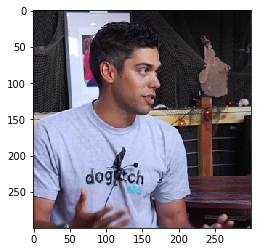

In [24]:
plt.imshow(image2)

In [25]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [26]:
import cv2


In [40]:
x2 = []
y2 = []
for i in range(len(x)):
  img = cv2.cvtColor(x[i], cv2.COLOR_BGR2GRAY)
  img2 = cv2.resize(img,(300,300))
  x2.append(img2)
  img_label = np.where(y[i]=="male",1,0)
  y2.append(img_label)

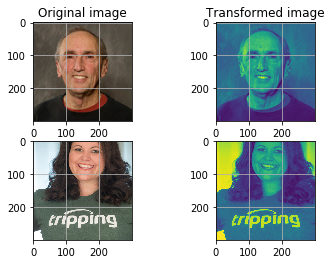

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow(x[0])
plt.title('Original image')
plt.grid('off')
plt.subplot(222)
plt.title('Transformed image')
plt.imshow(x2[0])
plt.grid('off')
plt.subplot(223)
plt.imshow(x[1000])
plt.grid('off')
plt.subplot(224)
plt.imshow(x2[1000])
plt.grid('off')
plt.show()

In [27]:
X = np.array(x2)/255
Y = np.array(y2)

In [28]:
Y[5],y[5]

(1, 'male')

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=42)

In [30]:
import tensorflow as tf 
from tensorflow import keras

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential

In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(5,5),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 59, 59, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 59, 59, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 512)       1

In [33]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
history = model.fit(X_train, y_train, batch_size=32,epochs=50,verbose=1,validation_data = (X_test, y_test))

Train on 1568 samples, validate on 175 samples
Epoch 1/50
1568/1568 [==============================] - 8s 5ms/sample - loss: 0.7079 - accuracy: 0.4962 - val_loss: 0.6941 - val_accuracy: 0.4800
Epoch 2/50
1568/1568 [==============================] - 4s 3ms/sample - loss: 0.6808 - accuracy: 0.5714 - val_loss: 0.6748 - val_accuracy: 0.6114
Epoch 3/50
1568/1568 [==============================] - 4s 3ms/sample - loss: 0.6592 - accuracy: 0.6276 - val_loss: 0.6441 - val_accuracy: 0.6343
Epoch 4/50
1568/1568 [==============================] - 4s 3ms/sample - loss: 0.6198 - accuracy: 0.6696 - val_loss: 0.6467 - val_accuracy: 0.6114
Epoch 5/50
1568/1568 [==============================] - 4s 3ms/sample - loss: 0.6122 - accuracy: 0.6798 - val_loss: 0.6032 - val_accuracy: 0.6686
Epoch 6/50
1568/1568 [==============================] - 4s 3ms/sample - loss: 0.5703 - accuracy: 0.7015 - val_loss: 0.6062 - val_accuracy: 0.6857
Epoch 7/50
1568/1568 [==============================] - 4s 3ms/sample - loss:

In [35]:
np.mean(Y)

0.4859437751004016

In [36]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

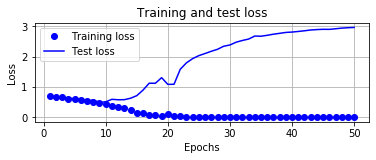

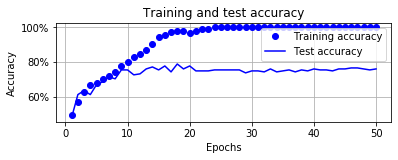

In [37]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['accuracy'], 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.legend()
plt.grid('off')
plt.show()